<a href="https://colab.research.google.com/github/HaeRin-OortCloud/Data-Analysis/blob/main/EDA_with_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Modules

In [ ]:
import pandas as pd

Loading the data

In [ ]:
data = pd.read_json("movies_dataset.json")
data.head()

,color,director_name,num_critic_for_reviews,duration,gross,genres,star_name,movie_title,movie_imdb_link,language,country,budget,title_year,imdb_score
0,Color,James Cameron,723.0,178.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,English,USA,237000000.0,2009.0,7.9
1,Color,Gore Verbinski,302.0,169.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,English,USA,300000000.0,2007.0,7.1
2,Color,Sam Mendes,602.0,148.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,English,UK,245000000.0,2015.0,6.8
3,Color,Christopher Nolan,813.0,164.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,English,USA,250000000.0,2012.0,8.5
4,NaN,Doug Walker,NaN,NaN,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,7.1


Check the dataframe shape (#rows and #columns)

In [ ]:
data.shape

(5043, 14)

Check the data types of the columns

In [ ]:
data.dtypes

color                      object
director_name              object
num_critic_for_reviews    float64
duration                  float64
gross                     float64
genres                     object
star_name                  object
movie_title                object
movie_imdb_link            object
language                   object
country                    object
budget                    float64
title_year                float64
imdb_score                float64
dtype: object

Column Selection

In [ ]:
data['budget']

0       237000000.0
1       300000000.0
2       245000000.0
3       250000000.0
4               NaN
           ...     
5038            NaN
5039            NaN
5040         1400.0
5041            NaN
5042         1100.0
Name: budget, Length: 5043, dtype: float64

---

## Data Preparation
Remove some columns:    
   
   - `movie_imdb_link`
   - `num_critic_for_reviews`
   - `genre`

In [ ]:
data.drop(axis = 1, columns = ["movie_imdb_link"], inplace = True)
data.head()

,color,director_name,num_critic_for_reviews,duration,gross,genres,star_name,movie_title,language,country,budget,title_year,imdb_score
0,Color,James Cameron,723.0,178.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,English,USA,237000000.0,2009.0,7.9
1,Color,Gore Verbinski,302.0,169.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,English,USA,300000000.0,2007.0,7.1
2,Color,Sam Mendes,602.0,148.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,English,UK,245000000.0,2015.0,6.8
3,Color,Christopher Nolan,813.0,164.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,English,USA,250000000.0,2012.0,8.5
4,NaN,Doug Walker,NaN,NaN,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens,NaN,NaN,NaN,NaN,7.1


Exercise: Remove the rest of the columns


In [ ]:
data.drop(axis = 1, columns = ["num_critic_for_reviews", "genres"], inplace = True)

Check the shape again

In [ ]:
data.shape

(5043, 11)

Convert the dtype of `title_year` column to integer

In [ ]:
data.title_year = data.title_year.astype("Int64")

Check the dataframe again

In [ ]:
data.head()

,color,director_name,duration,gross,star_name,movie_title,language,country,budget,title_year,imdb_score
0,Color,James Cameron,178.0,760505847.0,CCH Pounder,Avatar,English,USA,237000000.0,2009,7.9
1,Color,Gore Verbinski,169.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,English,USA,300000000.0,2007,7.1
2,Color,Sam Mendes,148.0,200074175.0,Christoph Waltz,Spectre,English,UK,245000000.0,2015,6.8
3,Color,Christopher Nolan,164.0,448130642.0,Tom Hardy,The Dark Knight Rises,English,USA,250000000.0,2012,8.5
4,NaN,Doug Walker,NaN,NaN,Doug Walker,Star Wars: Episode VII - The Force Awakens,NaN,NaN,NaN,<NA>,7.1


Renaming some columns:
- changing `gross` to `movie_income` and `budget` to `movie_budget`

In [ ]:
rename_dict = {"gross" : "movie_income", "budget" : "movie_budget"}
data.rename(columns = rename_dict, inplace = True)
data.head()

,color,director_name,duration,movie_income,star_name,movie_title,language,country,movie_budget,title_year,imdb_score
0,Color,James Cameron,178.0,760505847.0,CCH Pounder,Avatar,English,USA,237000000.0,2009,7.9
1,Color,Gore Verbinski,169.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,English,USA,300000000.0,2007,7.1
2,Color,Sam Mendes,148.0,200074175.0,Christoph Waltz,Spectre,English,UK,245000000.0,2015,6.8
3,Color,Christopher Nolan,164.0,448130642.0,Tom Hardy,The Dark Knight Rises,English,USA,250000000.0,2012,8.5
4,NaN,Doug Walker,NaN,NaN,Doug Walker,Star Wars: Episode VII - The Force Awakens,NaN,NaN,NaN,<NA>,7.1


---
### Data Analysis


Checkout the distribution of `duration` column using a histogram.


In [ ]:
data.head(3)

,color,director_name,duration,movie_income,star_name,movie_title,language,country,movie_budget,title_year,imdb_score
0,Color,James Cameron,178.0,760505847.0,CCH Pounder,Avatar,English,USA,237000000.0,2009,7.9
1,Color,Gore Verbinski,169.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,English,USA,300000000.0,2007,7.1
2,Color,Sam Mendes,148.0,200074175.0,Christoph Waltz,Spectre,English,UK,245000000.0,2015,6.8


Text(0.5, 1.0, 'Movie Duration Histogram')

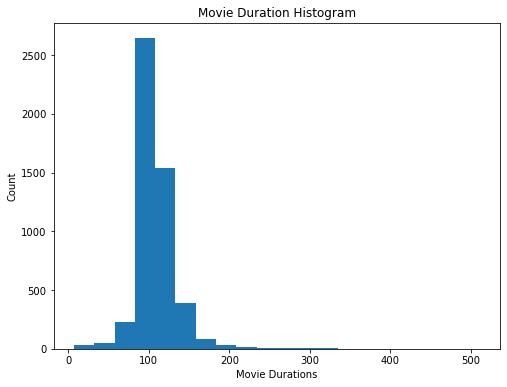

In [ ]:
ax = data.duration.hist(bins = 20, figsize = (8, 6), grid = False)
ax.set_xlabel("Movie Durations")
ax.set_ylabel("Count")
ax.set_title("Movie Duration Histogram")

Exercise: Create a hitogram to see the distribution of `imdb_score` column

Text(0.5, 1.0, 'Movies Imdb score Histogram')

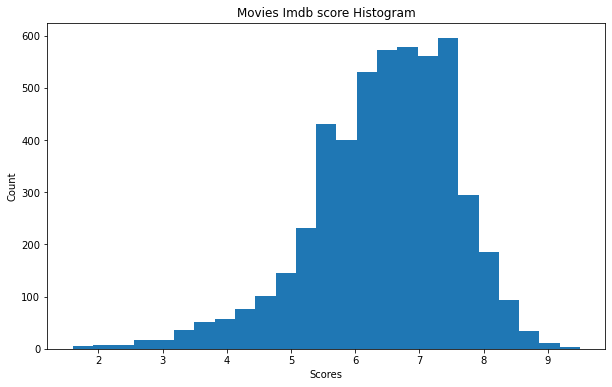

In [ ]:
ax = data.imdb_score.hist(bins = 25, figsize = (10, 6), grid = False)
ax.set_xlabel("Scores")
ax.set_ylabel("Count")
ax.set_title("Movies Imdb score Histogram")

Check how many movies have the `imdb_score` less than `4`.

In [ ]:
low_score_movies = data[data.imdb_score < 4]
low_score_movies

,color,director_name,duration,movie_income,star_name,movie_title,language,country,movie_budget,title_year,imdb_score
217,Color,Joel Schumacher,125.0,107285004.0,Michael Gough,Batman & Robin,English,USA,125000000.0,1997,3.7
267,Color,Jan de Bont,121.0,48068396.0,Jason Patric,Speed 2: Cruise Control,English,USA,160000000.0,1997,3.7
273,Color,Bo Welch,82.0,100446895.0,Sean Hayes,The Cat in the Hat,English,USA,109000000.0,2003,3.8
313,Color,Pitof,87.0,40198710.0,Frances Conroy,Catwoman,English,USA,100000000.0,2004,3.3
319,Color,Lawrence Guterman,94.0,17010646.0,Jamie Kennedy,Son of the Mask,English,USA,84000000.0,2005,2.2
...,...,...,...,...,...,...,...,...,...,...,...
4988,Color,Terron R. Parsons,93.0,NaN,Richard Tyson,Hayride,English,USA,60000.0,2012,3.4
5000,Color,Travis Legge,83.0,NaN,Elissa Dowling,Raymond Did It,English,USA,40000.0,2011,3.2
5002,Color,Collin Joseph Neal,75.0,NaN,Julianne Gabert,"Run, Hide, Die",English,USA,50000.0,2012,3.7
5017,Color,Travis Legge,90.0,NaN,Kristen Seavey,Dry Spell,English,USA,22000.0,2013,3.3


In [ ]:
low_score_movies.shape

(156, 11)

Exercise: Use a histogram to visualize the distribution of movie IMdb score in that are produced in `USA`.

Text(0.5, 1.0, 'USA Movies Imdb Score Histogram')

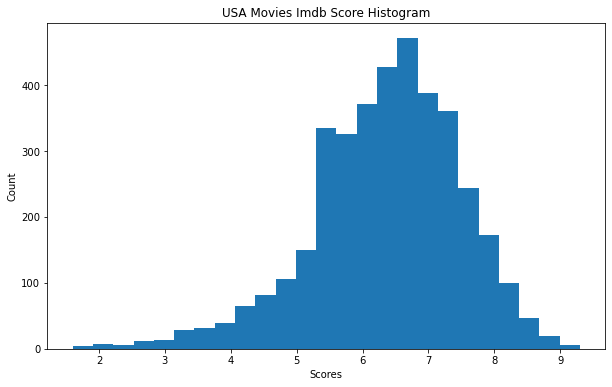

In [ ]:
ax = data[data.country == "USA"].imdb_score.hist(bins = 25, figsize = (10, 6), grid = False)
ax.set_xlabel("Scores")
ax.set_ylabel("Count")
ax.set_title("USA Movies Imdb Score Histogram")

---
### Answer to some analytical questions
    
Question 1 - In which year we have the `highest` and `lowest` number of movies?

Finding out number of movies per year

In [ ]:
count_per_year = data.groupby("title_year").size()
count_per_year.idxmax()
count_per_year.idxmin()

1916

Create a line chart to show the result

Text(0, 0.5, '#movies')

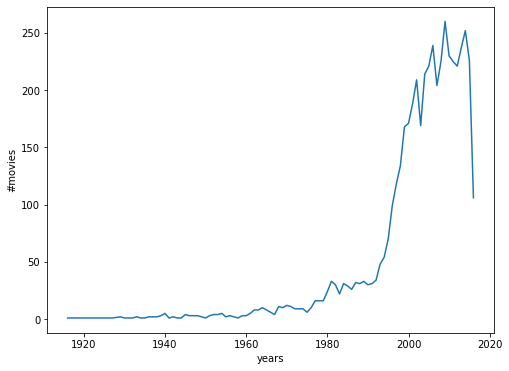

In [ ]:
ax = count_per_year.plot(figsize = (8,6))
ax.set_xlabel("years")
ax.set_ylabel("#movies")

Question 2 - In which year we have `minimum` and `maximum` average `imdb_score` ?

Finding average imdb score per year

In [ ]:
avgscores = data.groupby("title_year")["imdb_score"].mean()
avgscores

title_year
1916    8.000000
1920    4.800000
1925    8.300000
1927    8.300000
1929    7.150000
          ...   
2012    6.266516
2013    6.369620
2014    6.228175
2015    6.033628
2016    6.399057
Name: imdb_score, Length: 91, dtype: float64

Use a barchart to visualize the result

Text(0, 0.5, 'Score')

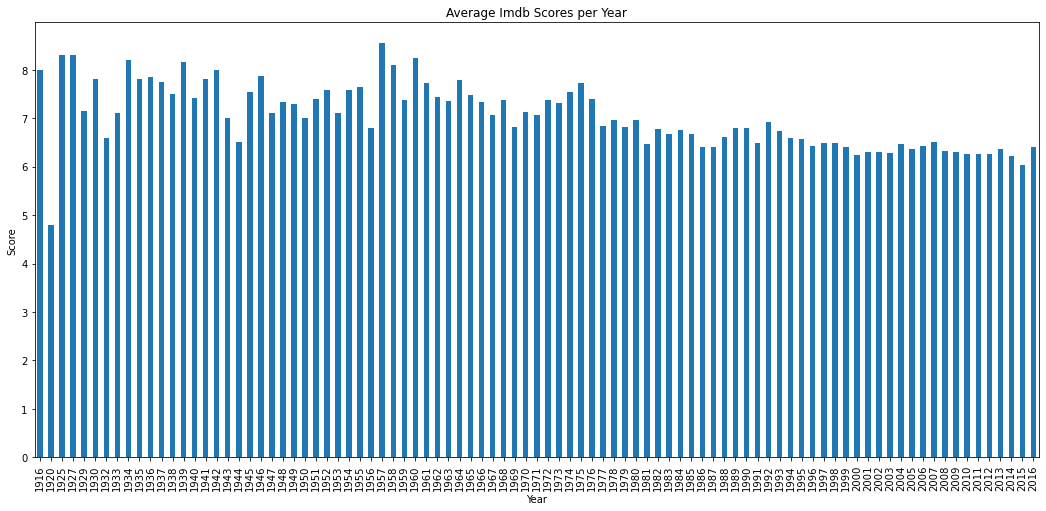

In [ ]:
ax = avgscores.plot.bar(figsize = (18,8), title = "Average Imdb Scores per Year")
ax.set_xlabel("Year")
ax.set_ylabel("Score")

Exercise:
Question 3 - In which year we have the `minimum` and `maximum` spent movie budget?

`Use a line chart to visualize your results.`

Text(0, 0.5, 'Budget')

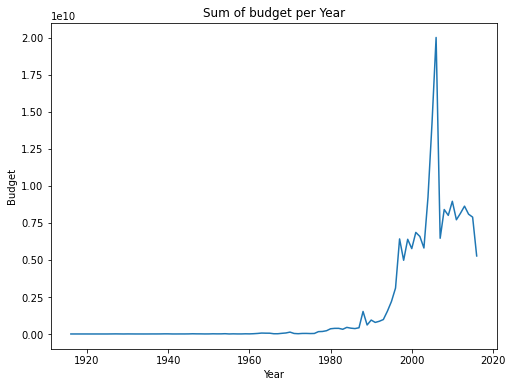

In [ ]:
ax = data.groupby("title_year")["movie_budget"].sum().plot(figsize = (8,6), title = "Sum of budget per Year")
ax.set_xlabel("Year")
ax.set_ylabel("Budget")

Question 4 - Is there any relationship between IMdb score of a movie and the movie income?

To approaches to solve this question:
- Visual Correlation Analysis
- Generating the Correlation Matirx

In [ ]:
data_cor = data[["imdb_score", "movie_income"]]
data_cor

,imdb_score,movie_income
0,7.9,760505847.0
1,7.1,309404152.0
2,6.8,200074175.0
3,8.5,448130642.0
4,7.1,NaN
...,...,...
5038,7.7,NaN
5039,7.5,NaN
5040,6.3,NaN
5041,6.3,10443.0


Drop the rows with `non` values

In [ ]:
data_cor.dropna(inplace = True)

<ipython-input-117-53dc58b27d2d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cor.dropna(inplace = True)


Create a scatter plot to see the data

<AxesSubplot:xlabel='imdb_score', ylabel='movie_income'>

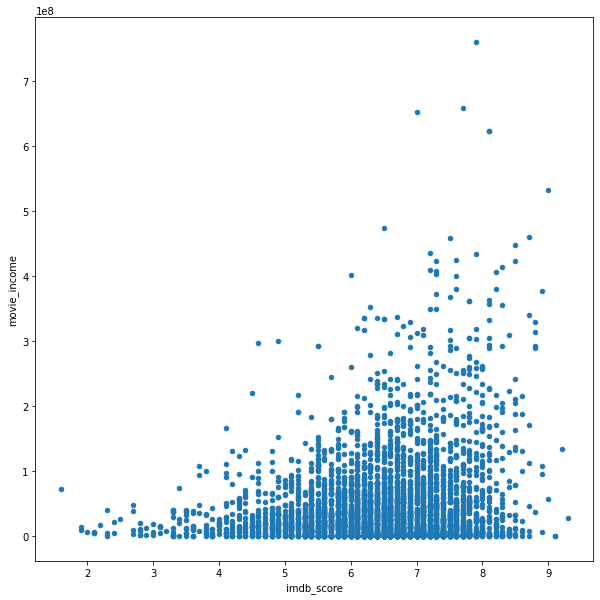

In [ ]:
data_cor.plot.scatter(x = "imdb_score", y = "movie_income", figsize = (10,10))

Generate the correlation matrix

In [ ]:
data_cor.corr()

,imdb_score,movie_income
imdb_score,1.000000,0.198021
movie_income,0.198021,1.000000
